# Conversion Optimization by analysing ad campaigns
### Data:

The data used in this project is from an anonymous organisation’s social media ad campaign.

1.) ad_id: an unique ID for each ad.

2.) campaignid: an ID associated with each ad campaign of company.

3.) fbcampaignid: an ID associated with how Facebook tracks each campaign.

4.) age: age of the person to whom the ad is shown.

5.) gender: gender of the person to whim the add is shown

6.) interest: a code specifying the category to which the person’s interest belongs (interests are as mentioned in the person’s Facebook public profile).

7.) Impressions: the number of times the ad was shown.

8.) Clicks: number of clicks on for that ad.

9.) Spent: Amount paid by company to Facebook, to show that ad.

10.) Total conversion: Total number of people who enquired about the product after seeing the ad.

11.) Approved conversion: Total number of people who bought the product after seeing the ad.

#### Author: Jackie Sun

In [10]:
import numpy as np
import pandas as pd

In [11]:
df=pd.read_csv("conversion_data.csv")
df.head()

,ad_id,campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ad_id                1143 non-null   int64  
 1   campaign_id          1143 non-null   int64  
 2   fb_campaign_id       1143 non-null   int64  
 3   age                  1143 non-null   object 
 4   gender               1143 non-null   object 
 5   interest             1143 non-null   int64  
 6   Impressions          1143 non-null   int64  
 7   Clicks               1143 non-null   int64  
 8   Spent                1143 non-null   float64
 9   Total_Conversion     1143 non-null   int64  
 10  Approved_Conversion  1143 non-null   int64  
dtypes: float64(1), int64(8), object(2)
memory usage: 98.4+ KB


In [13]:
df.describe()

,ad_id,campaign_id,fb_campaign_id,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
count,1.143000e+03,1143.000000,1143.000000,1143.000000,1.143000e+03,1143.000000,1143.000000,1143.000000,1143.000000
mean,9.872611e+05,1067.382327,133783.989501,32.766404,1.867321e+05,33.390201,51.360656,2.855643,0.944007
std,1.939928e+05,121.629393,20500.308622,26.952131,3.127622e+05,56.892438,86.908418,4.483593,1.737708
min,7.087460e+05,916.000000,103916.000000,2.000000,8.700000e+01,0.000000,0.000000,0.000000,0.000000
25%,7.776325e+05,936.000000,115716.000000,16.000000,6.503500e+03,1.000000,1.480000,1.000000,0.000000
50%,1.121185e+06,1178.000000,144549.000000,25.000000,5.150900e+04,8.000000,12.370000,1.000000,1.000000
75%,1.121804e+06,1178.000000,144657.500000,31.000000,2.217690e+05,37.500000,60.025000,3.000000,1.000000
max,1.314415e+06,1178.000000,179982.000000,114.000000,3.052003e+06,421.000000,639.949998,60.000000,21.000000


### Correlation Heat Map

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

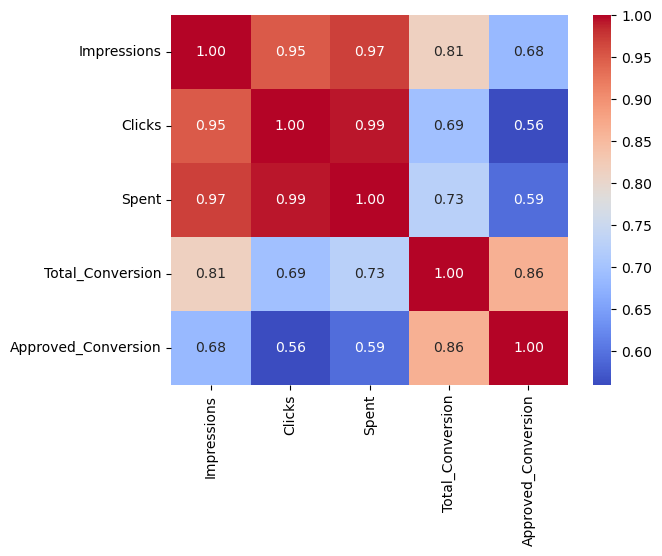

In [8]:
g=sns.heatmap(df[["Impressions","Clicks","Spent","Total_Conversion","Approved_Conversion"]].corr(),annot=True ,fmt=".2f", cmap="coolwarm")

In [14]:
df["campaign_id"].unique()

array([ 916,  936, 1178])

Here, we see there are 3 different ad campaigns for the company.

Now we'll replace their names with campaign_a, campaign_b and campaign_c for better visualisation which creates problem with integer values

In [15]:
df["campaign_id"].replace({916:"campaign_a",936:"campaign_b",1178:"campaign_c"}, inplace=True)

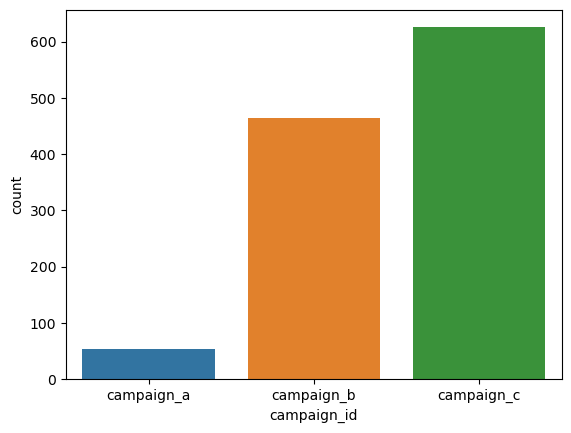

In [17]:
# count plot on single categorical variable 
sns.countplot(x ='campaign_id', data = df) 
# Show the plot 
plt.show() 

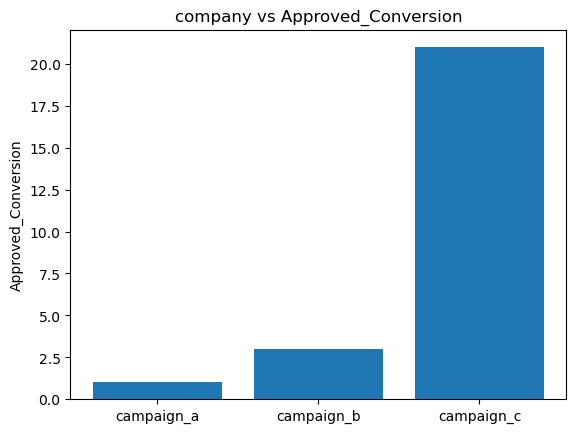

In [18]:
#Approved_Conversion
# Creating our bar plot
plt.bar(df["campaign_id"], df["Approved_Conversion"])
plt.ylabel("Approved_Conversion")
plt.title("company vs Approved_Conversion")
plt.show()

It's clear from both the above graphs that compaign_c has better Approved_conversion count, i.e. most people bought products in campaign_c.

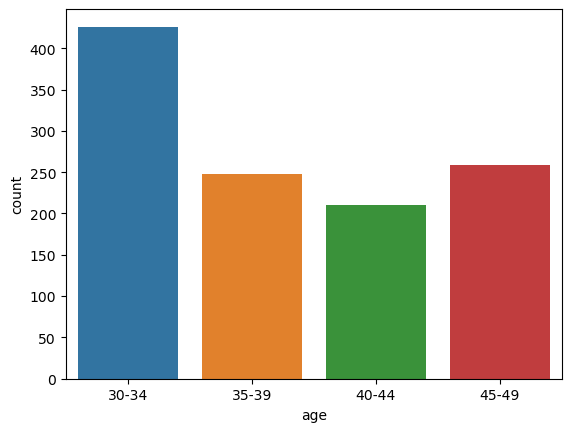

In [19]:
# count plot on single categorical variable 
sns.countplot(x ='age', data = df) 
# Show the plot 
plt.show() 

<AxesSubplot:xlabel='campaign_id', ylabel='Approved_Conversion'>

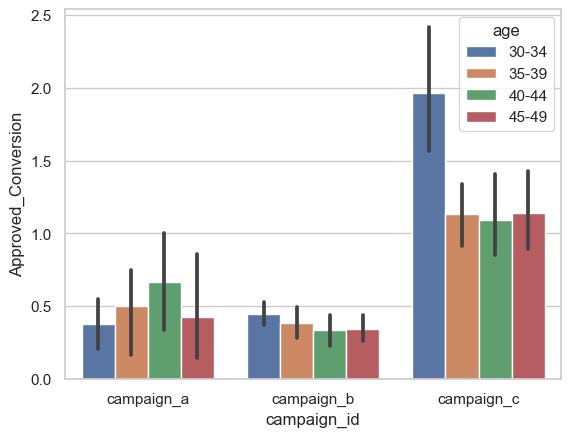

In [21]:
sns.set(style="whitegrid")
tips = sns.load_dataset("tips")
sns.barplot(x=df["campaign_id"], y=df["Approved_Conversion"], hue=df["age"], data=tips)

It's interesting to note that in campaign_c and campaign_b, the age group of 30-34 shows more interest, whereas in campaign_a the age group of 40-44 shows more interest.

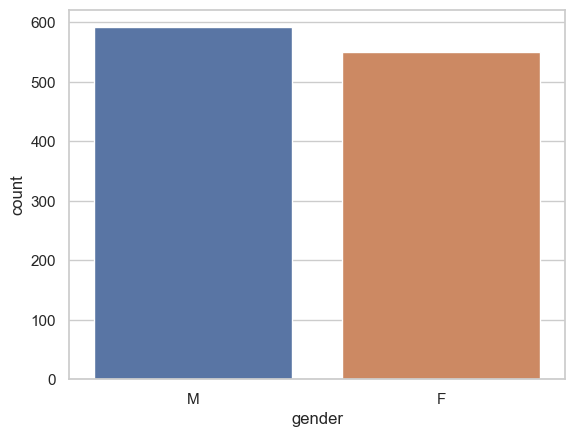

In [22]:
# count plot on single categorical variable 
sns.countplot(x ='gender', data = df) 
# Show the plot 
plt.show() 

<AxesSubplot:xlabel='campaign_id', ylabel='Approved_Conversion'>

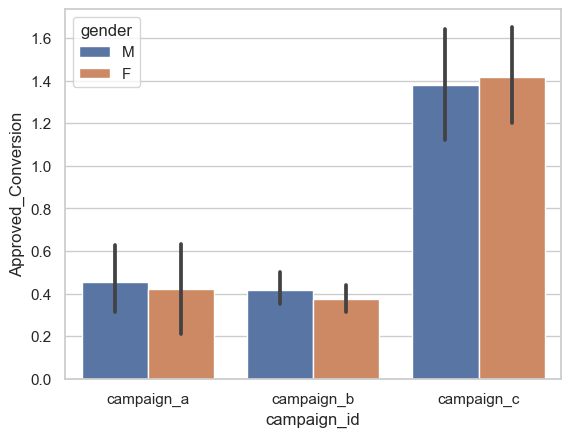

In [24]:
sns.set(style="whitegrid")
tips = sns.load_dataset("tips")
sns.barplot(x=df["campaign_id"], y=df["Approved_Conversion"], hue=df["gender"], data=tips)

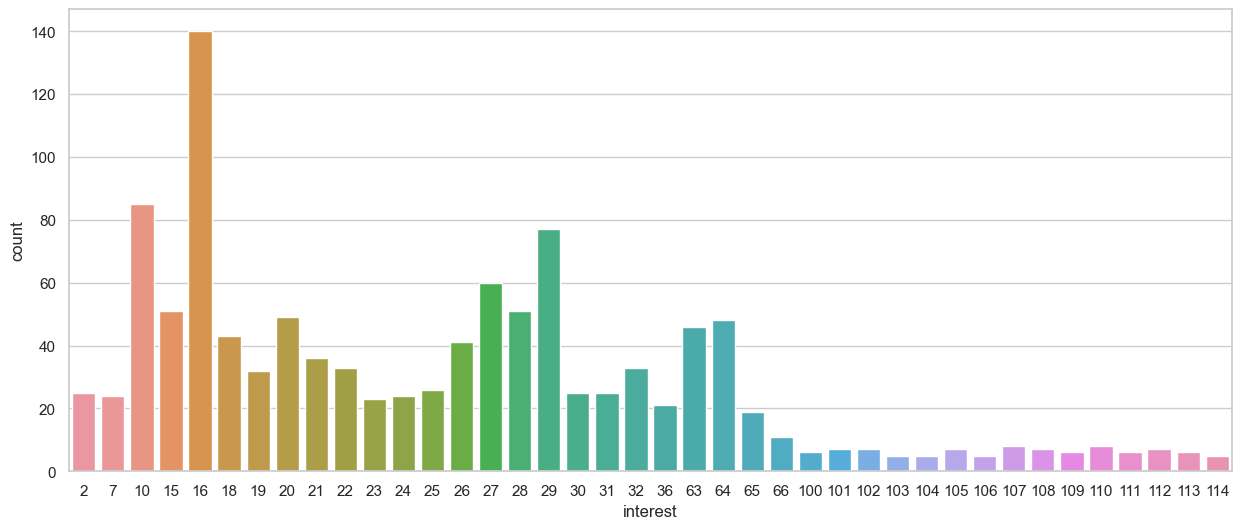

In [25]:
# count plot on single categorical variable 
fig_dims = (15,6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x ='interest', data = df) 
# Show the plot 
plt.show() 

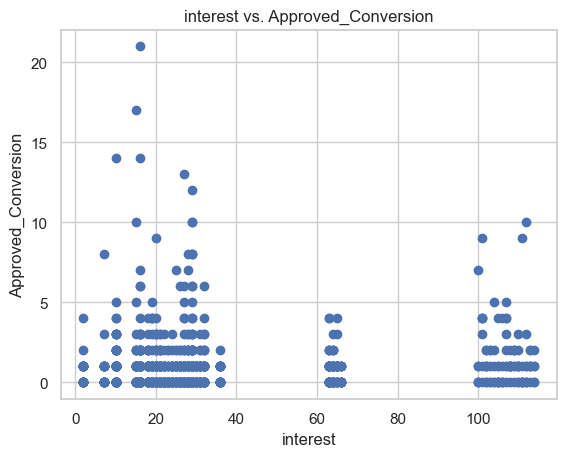

In [26]:
plt.scatter(df["interest"], df["Approved_Conversion"])
plt.title("interest vs. Approved_Conversion")
plt.xlabel("interest")
plt.ylabel("Approved_Conversion")
plt.show()

It's interesting to note that, although the count of interest after 100 is less,there is a rise of users after 100 who actually bought the product. Rest of the distribution is according to what was expected.

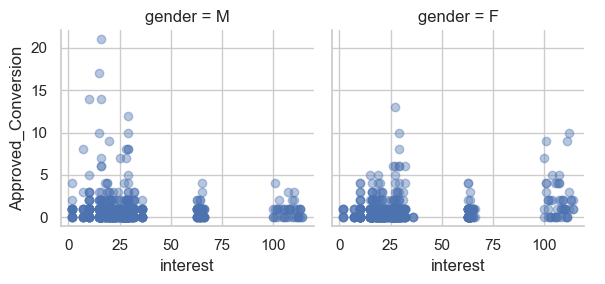

In [27]:
g = sns.FacetGrid(df, col="gender")
g.map(plt.scatter, "interest", "Approved_Conversion", alpha=.4)
g.add_legend();

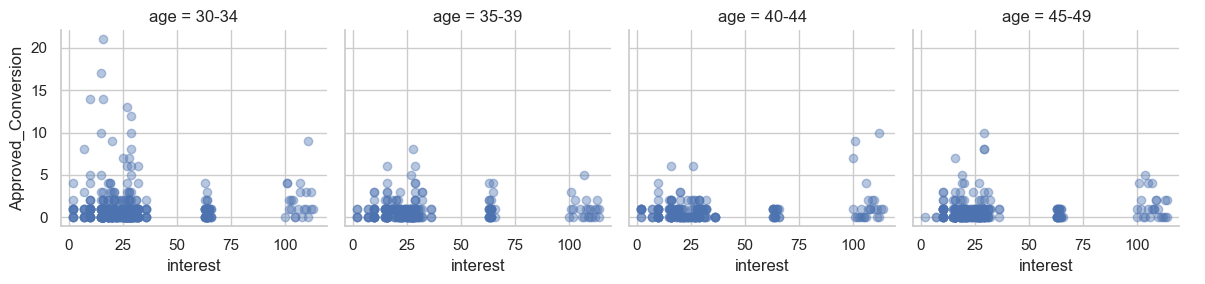

In [28]:
g = sns.FacetGrid(df, col="age")
g.map(plt.scatter, "interest", "Approved_Conversion", alpha=.4)
g.add_legend();

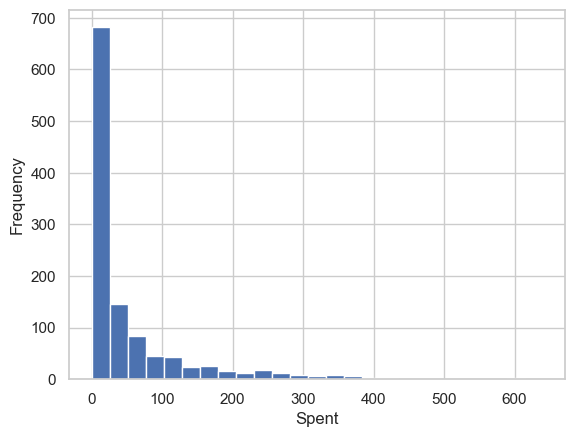

In [29]:
plt.hist(df['Spent'], bins = 25)
plt.xlabel("Spent")
plt.ylabel("Frequency")
plt.show()

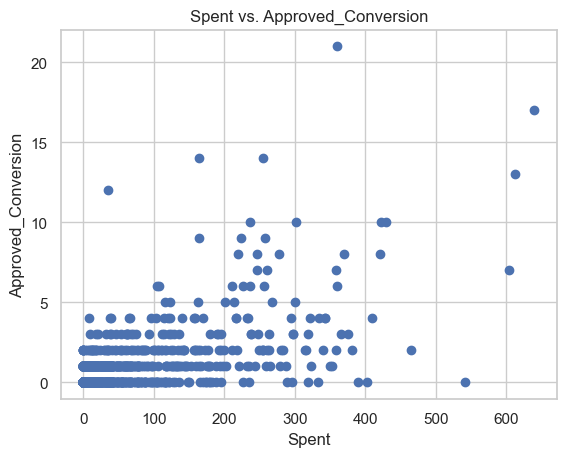

In [30]:
plt.scatter(df["Spent"], df["Approved_Conversion"])
plt.title("Spent vs. Approved_Conversion")
plt.xlabel("Spent")
plt.ylabel("Approved_Conversion")
plt.show()

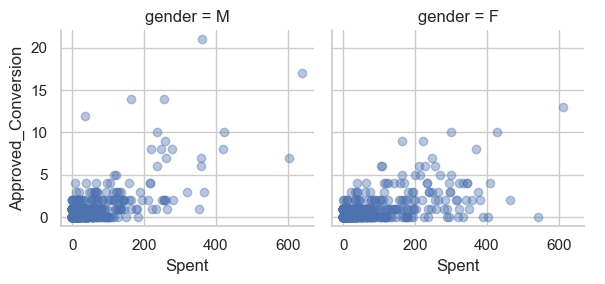

In [31]:
g = sns.FacetGrid(df, col="gender")
g.map(plt.scatter, "Spent", "Approved_Conversion", alpha=.4)
g.add_legend();

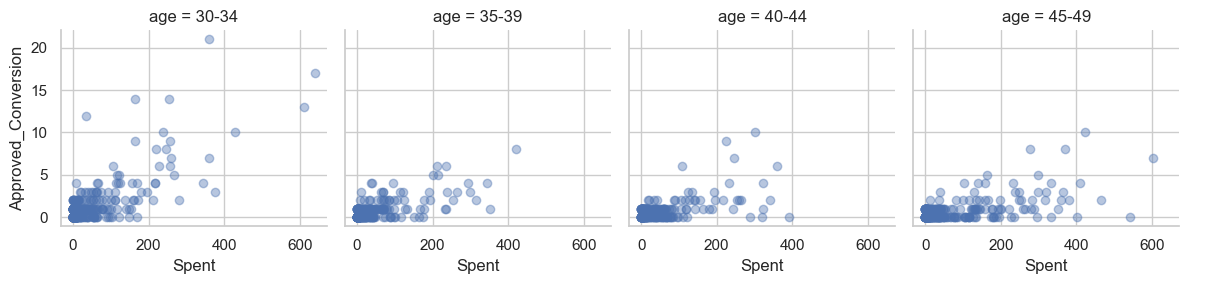

In [32]:
g = sns.FacetGrid(df, col="age")
g.map(plt.scatter, "Spent", "Approved_Conversion", alpha=.4)
g.add_legend();

### People who actually bought the product

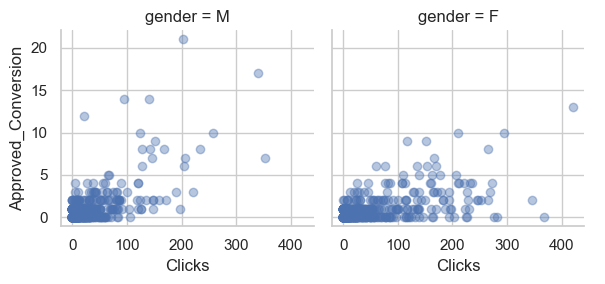

In [34]:
g = sns.FacetGrid(df, col="gender")
g.map(plt.scatter, "Clicks", "Approved_Conversion", alpha=.4)
g.add_legend();

It seems men tend to click more than women but women buy more products than men after clicking the add.

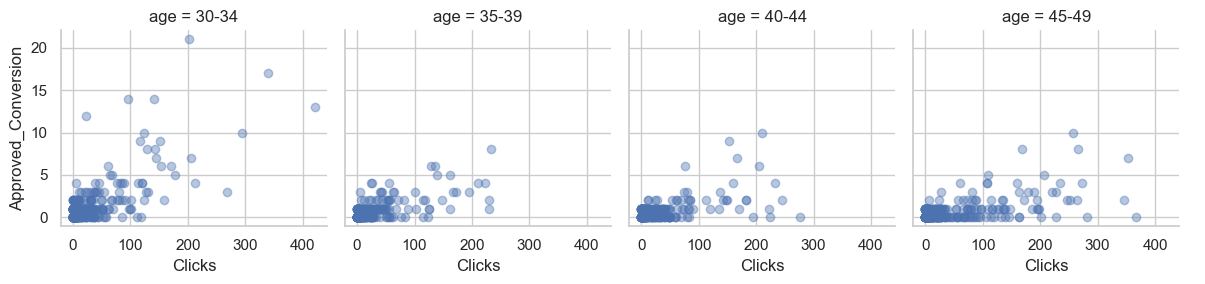

In [35]:
g = sns.FacetGrid(df, col="age")
g.map(plt.scatter, "Clicks", "Approved_Conversion", alpha=.4)
g.add_legend();

People in age group 30-34 has more tendency to buy product after clicking the add.

### People who enquiry the product

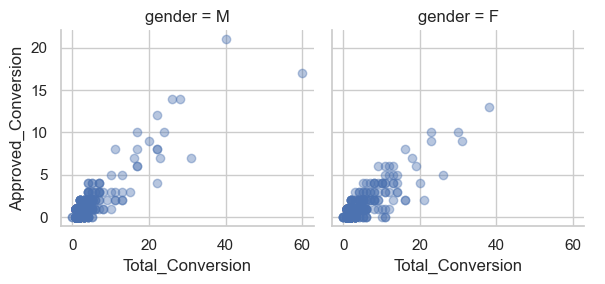

In [36]:
g = sns.FacetGrid(df, col="gender")
g.map(plt.scatter, "Total_Conversion", "Approved_Conversion", alpha=.4)
g.add_legend();

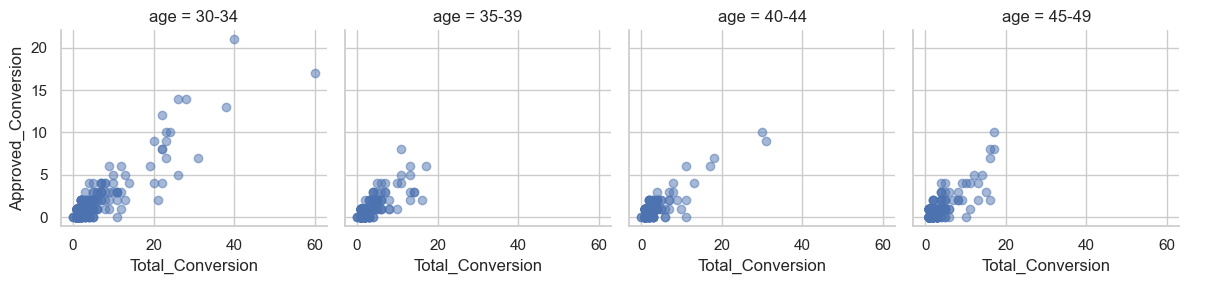

In [37]:
g = sns.FacetGrid(df, col="age")
g.map(plt.scatter, "Total_Conversion", "Approved_Conversion",alpha=.5)
g.add_legend()

###  Zoom into campaign with most approved_conversion

In [41]:
a=[]
b=[]
c=[]
for i,j,k in zip(df.campaign_id, df.fb_campaign_id, df.Approved_Conversion):
    if i=="campaign_c":
      a.append(i),b.append(j),c.append(k)
d={'campaign_name':a, 'fb_campaign_id':b, 'Approved_Conversion':c}     
campaign_c=pd.DataFrame(d)
campaign_c.head()

,campaign_name,fb_campaign_id,Approved_Conversion
0,campaign_c,144531,14
1,campaign_c,144531,5
2,campaign_c,144531,1
3,campaign_c,144531,2
4,campaign_c,144531,2


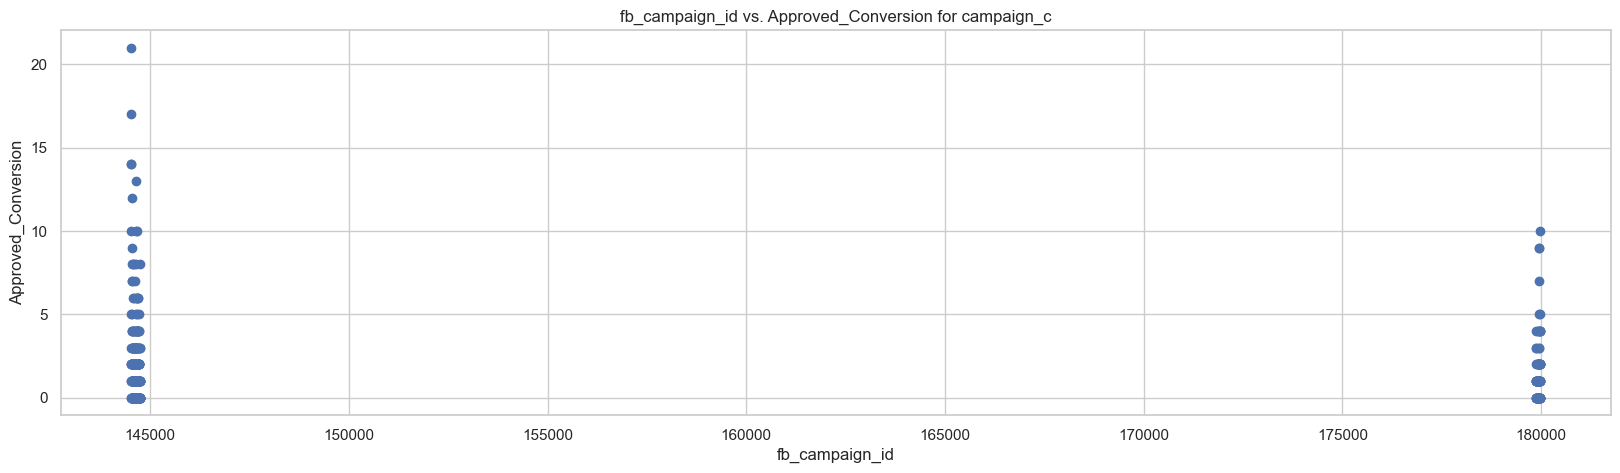

In [42]:
plt.figure(figsize=(20,5))
plt.scatter(campaign_c["fb_campaign_id"], campaign_c["Approved_Conversion"])
plt.title("fb_campaign_id vs. Approved_Conversion for campaign_c")
plt.xlabel("fb_campaign_id")
plt.ylabel("Approved_Conversion")
plt.show()

We can see fb_campaign_ids around 145000 have more Approved_Conversion than around 180000 for campaign_c



## Summary

#### Correlations:

"Impressions" and "Total_Conversion" are more correlated with "Approved_Conversion" than "Clicks" and "Spent".

#### Campaign_C:

campaign_c has most number of ads.
compaign_c has better Approved_conversion count, i.e. most people bought products in campaign_c.

#### age_group:

In campaign_c and campaign_b, the age group of 30-34 shows more interest, whereas in campaign_a the age group of 40-44 shows more interest.

#### gender:

Both the genders shows similar interests in all three campaigns.

#### interest:

Although the count of interest after 100 is less,there is a rise of users after 100 who actually bought the product. Rest of the distribution is according to what was expected.
money spent:

As the amount of money spent increases, no of product bought increases.
There is a sudden rise in the Approved_Conversion after a certain point in Impressions.

#### Product bought after clicking the ad:

It seems men tend to click more than women but women buy more products than men after clicking the add.
People in age group 30-34 has more tendency to buy product after clicking the add.
Product bought after enquiring the ad:

It seems women buys more products than men after enquiring the product. However men tends to enquire more about the product.
It seems people in age group 30-34 are more likely to buy the product after enquiring the product.

#### Instructive_conclusion:

For campaign_c, fb_campaign_ids around 145000 have more Approved_Conversion than around 180000

### Modelling 

In [52]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [46]:
df["campaign_id"].replace({"campaign_a":916 ,"campaign_b":936 ,"campaign_c":1178}, inplace=True)
encoder=LabelEncoder()
encoder.fit(df["gender"])
df["gender"]=encoder.transform(df["gender"])
encoder.fit(df["age"])
df["age"]=encoder.transform(df["age"])
df.head()

,ad_id,campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,0,1,15,7350,1,1.43,2,1
1,708749,916,103917,0,1,16,17861,2,1.82,2,0
2,708771,916,103920,0,1,20,693,0,0.00,1,0
3,708815,916,103928,0,1,28,4259,1,1.25,1,0
4,708818,916,103928,0,1,28,4133,1,1.29,1,1


In [47]:
x=np.array(df.drop(labels=["Approved_Conversion","Total_Conversion"], axis=1))
y=np.array(df["Total_Conversion"])
y=y.reshape(len(y),1)

In [53]:
sc_x= StandardScaler()
x = sc_x.fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)

## Random Forest Regressor to predict Total_Conversion

In [56]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [54]:
rfr = RandomForestRegressor(n_estimators = 10, random_state = 0)
rfr.fit(x_train, y_train)

/var/folders/3f/pn27ypld2z30rmhc5_2qsb7m0000gn/T/ipykernel_67464/1269348452.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfr.fit(x_train, y_train)


RandomForestRegressor(n_estimators=10, random_state=0)

In [55]:
y_pred=rfr.predict(x_test)
y_pred=np.round(y_pred)

In [57]:
mae=mean_absolute_error(y_test, y_pred)
mse=mean_squared_error(y_test, y_pred)
rmse=np.sqrt(mse)
r2_score=r2_score(y_test, y_pred)

In [58]:
mae

0.9912663755458515

In [59]:
r2_score

0.7530816415210646

we have got 0.753 of R-squared value which means 75.3% of the data fits the regression model.